In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns
from matplotlib.ticker import MaxNLocator
from scipy.stats import pearsonr

In [2]:
dataset1_path = "/home/saydam/Desktop/yzv211/project/data_folder/estat_sdg_07_40.tsv" #renewable energy dosya path
dataset2_path = "/home/saydam/Desktop/yzv211/project/data_folder/per-capita-co-emissions.csv" ##co2 emission dosya path


In [3]:
data1 = pd.read_csv(dataset1_path , sep="\t")
data2 = pd.read_csv(dataset2_path)

In [4]:
#data1 seti düzenleme
data1[['freq' , 'nrg_bal','unit' , 'geo']] = data1['freq,nrg_bal,unit,geo\TIME_PERIOD'].str.split(',' , expand=True)
data1 = data1.drop(columns=['freq,nrg_bal,unit,geo\TIME_PERIOD'])


In [5]:
#ülke isimleri için json dosyasını okuma
with open("/home/saydam/Desktop/yzv211/project/data_folder/geo.json" ,"r") as f:
    geo_mapping = json.load(f)

print(geo_mapping)

{'AT': 'Austria', 'BE': 'Belgium', 'BG': 'Bulgaria', 'CY': 'Cyprus', 'CZ': 'Czech Republic', 'DE': 'Germany', 'DK': 'Denmark', 'EE': 'Estonia', 'EL': 'Greece', 'ES': 'Spain', 'FI': 'Finland', 'FR': 'France', 'HR': 'Croatia', 'HU': 'Hungary', 'IE': 'Ireland', 'IT': 'Italy', 'LT': 'Lithuania', 'LU': 'Luxembourg', 'LV': 'Latvia', 'MT': 'Malta', 'NL': 'Netherlands', 'PL': 'Poland', 'PT': 'Portugal', 'RO': 'Romania', 'SE': 'Sweden', 'SI': 'Slovenia', 'SK': 'Slovakia'}


In [6]:
eu_countries = list(geo_mapping.values())

In [7]:
data1 = data1.drop(columns = ['freq' , 'unit'])  #gereksiz sütunları silme
data1 = data1.dropna()

In [8]:
data1["geo"] = data1["geo"].map(geo_mapping)
data1.head()
#ülke isimlerini atama
data1 = data1.dropna()

In [9]:
for year in data1.columns[:-2]:
    data1[year] = pd.to_numeric(data1[year])
print(data1.dtypes)

2004       float64
2005       float64
2006       float64
2007       float64
2008       float64
2009       float64
2010       float64
2011       float64
2012       float64
2013       float64
2014       float64
2015       float64
2016       float64
2017       float64
2018       float64
2019       float64
2020       float64
2021       float64
2022       float64
2023       float64
nrg_bal     object
geo         object
dtype: object


In [10]:
#yenilebilir enerji kullanım oranı oaln veri setini nrg_bal sütununa göre parçalara ayırıyorum. çünkü her nrg_bal verisi 
#farklı bir alana işaret ediyor. genel kullanım oranı , elektrikte kullanım oranı vesaire. 
data1_ren = data1[data1["nrg_bal"] == "REN"]
data1_ren = data1_ren.drop(columns=["nrg_bal"]).reset_index(drop = True , inplace = False)
data1_elc = data1[data1["nrg_bal"] == "REN_ELC"]
data1_elc = data1_elc.drop(columns=["nrg_bal"]).reset_index(drop = True , inplace = False)
data1_heat_cl = data1[data1["nrg_bal"] == "REN_HEAT_CL"]
data1_heat_cl = data1_heat_cl.drop(columns=["nrg_bal"]).reset_index(drop = True , inplace = False)
data1_tra = data1[data1["nrg_bal"] == "REN_TRA"]
data1_tra = data1_tra.drop(columns=["nrg_bal"]).reset_index(drop = True , inplace = False)

In [11]:
data1_tra.head()

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,geo
0,4.532,5.070,7.532,8.241,9.560,11.175,10.705,10.077,10.031,9.695,...,11.409,10.583,9.703,9.931,10.051,10.283,9.568,10.744,13.207,Austria
1,0.642,0.663,0.676,0.671,0.712,2.190,4.800,4.802,4.914,5.088,...,3.921,6.029,6.637,6.709,6.817,11.035,10.315,10.443,12.095,Belgium
2,0.971,0.884,1.049,0.956,0.938,1.092,1.498,0.898,0.650,5.886,...,6.492,7.203,7.273,8.076,7.893,9.101,7.613,7.662,8.088,Bulgaria
3,0.000,0.000,0.000,0.000,1.921,2.036,1.994,0.000,0.000,1.127,...,2.521,2.671,2.561,2.661,3.316,7.401,7.189,7.228,7.285,Cyprus
4,1.203,1.099,1.073,1.048,2.843,4.312,5.220,1.285,6.249,6.445,...,6.537,6.496,6.616,6.556,7.841,9.383,6.740,6.240,5.653,Czech Republic


In [12]:
countries = list(data1["geo"])
print(countries)

['Austria', 'Belgium', 'Bulgaria', 'Cyprus', 'Czech Republic', 'Germany', 'Denmark', 'Estonia', 'Greece', 'Spain', 'Finland', 'France', 'Croatia', 'Hungary', 'Ireland', 'Italy', 'Lithuania', 'Luxembourg', 'Latvia', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Sweden', 'Slovenia', 'Slovakia', 'Austria', 'Belgium', 'Bulgaria', 'Cyprus', 'Czech Republic', 'Germany', 'Denmark', 'Estonia', 'Greece', 'Spain', 'Finland', 'France', 'Croatia', 'Hungary', 'Ireland', 'Italy', 'Lithuania', 'Luxembourg', 'Latvia', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Sweden', 'Slovenia', 'Slovakia', 'Austria', 'Belgium', 'Bulgaria', 'Cyprus', 'Czech Republic', 'Germany', 'Denmark', 'Estonia', 'Greece', 'Spain', 'Finland', 'France', 'Croatia', 'Hungary', 'Ireland', 'Italy', 'Lithuania', 'Luxembourg', 'Latvia', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Sweden', 'Slovenia', 'Slovakia', 'Austria', 'Belgium', 'Bulgaria', 'Cyprus', 'Czech Republic', 'Germany', 'Denmark', 

In [13]:
data2.head()

,Entity,Year,Annual CO₂ emissions (per capita)
0,Afghanistan,1949,0.001992
1,Afghanistan,1950,0.010837
2,Afghanistan,1951,0.011625
3,Afghanistan,1952,0.011468
4,Afghanistan,1953,0.013123


In [14]:
filtered_data2 = data2[(data2['Year'] > 2003) & (data2['Entity'].isin(countries))]

filtered_data2.head()

,Entity,Year,Annual CO₂ emissions (per capita)
1919,Austria,2004,9.505550
1920,Austria,2005,9.611116
1921,Austria,2006,9.288097
1922,Austria,2007,8.932471
1923,Austria,2008,8.829474


In [15]:
print(filtered_data2.shape)

(520, 3)


In [16]:
renewable_data_long = data1_ren.melt(
    id_vars=["geo"],
    var_name="Year",
    value_name="Renewable_Energy_Usage"
)

# Yıl verisini int yap
renewable_data_long["Year"] = renewable_data_long["Year"].astype(int)

# CO2 veri seti ile renewable energy veri setini birleştirme
merged_data = pd.merge(
    renewable_data_long,
    filtered_data2,
    left_on=["geo", "Year"],
    right_on=["Entity", "Year"],
    how="inner"
)

# Gereksiz sütunları kaldır
merged_data = merged_data.drop(columns=["Entity"])


In [17]:
print(merged_data.shape)
merged_data.head()

(520, 4)


,geo,Year,Renewable_Energy_Usage,Annual CO₂ emissions (per capita)
0,Austria,2004,22.553,9.505550
1,Belgium,2004,1.916,12.357553
2,Bulgaria,2004,9.231,6.403607
3,Cyprus,2004,3.071,7.649971
4,Germany,2004,6.207,10.677804


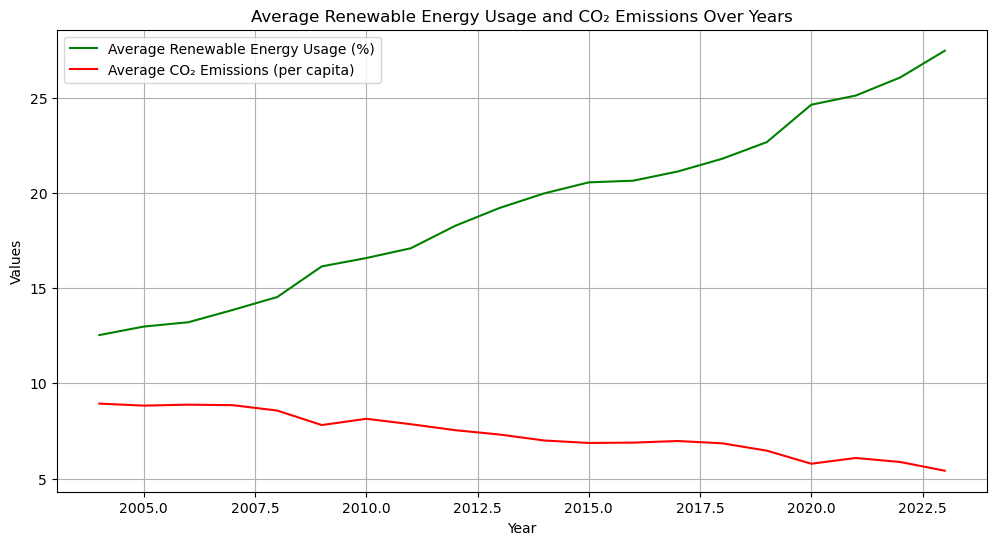

In [18]:
temp_data = merged_data.drop(columns = ['geo'])
yearly_avg = temp_data.groupby("Year").mean()

# Grafik oluştur
plt.figure(figsize=(12, 6))

# Yenilenebilir enerji kullanım oranı (yüzde) grafiği
plt.plot(list(yearly_avg.index), list(yearly_avg["Renewable_Energy_Usage"]), label="Average Renewable Energy Usage (%)", color="green")

# CO2 emisyon grafiği
plt.plot(list(yearly_avg.index), list(yearly_avg["Annual CO₂ emissions (per capita)"]), label="Average CO₂ Emissions (per capita)", color="red"
)

# Grafik başlığı, etiketler ve gösterge
plt.title("Average Renewable Energy Usage and CO₂ Emissions Over Years")
plt.xlabel("Year")
plt.ylabel("Values")
plt.legend()
plt.grid(True)

# Göster
plt.show()

In [19]:
corr, p_value = pearsonr(
    merged_data["Renewable_Energy_Usage"],
    merged_data["Annual CO₂ emissions (per capita)"]
)

print(f"Korelasyon Katsayısı: {corr:.2f}")
print(f"P-Value: {p_value:.2e}")

Korelasyon Katsayısı: -0.39
P-Value: 1.36e-20


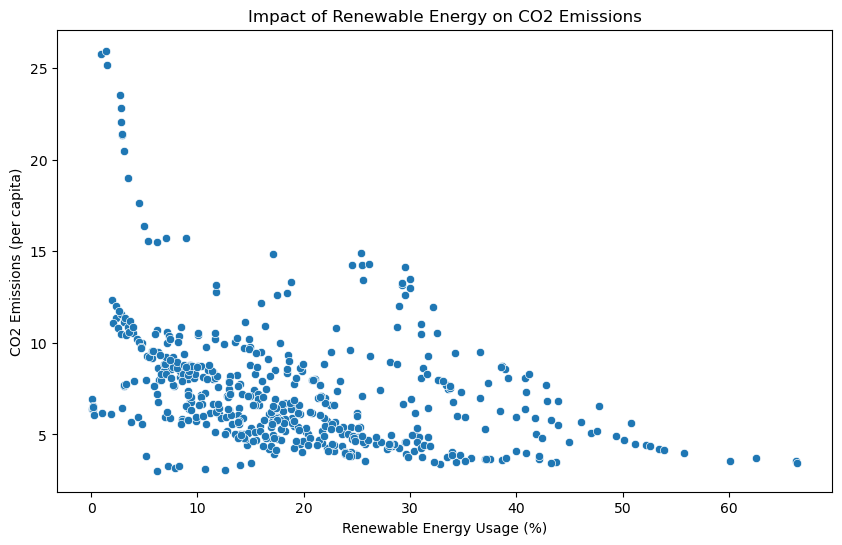

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="Renewable_Energy_Usage",
    y="Annual CO₂ emissions (per capita)",
    data=merged_data
)
plt.title("Impact of Renewable Energy on CO2 Emissions")
plt.xlabel("Renewable Energy Usage (%)")
plt.ylabel("CO2 Emissions (per capita)")
plt.show()


In [21]:
yearly_corr = merged_data.groupby("Year").apply(
    lambda group: pearsonr(
        group["Renewable_Energy_Usage"],
        group["Annual CO₂ emissions (per capita)"]
    )[0]
)
#burada da yıllara göre correlation katsayısının ortalaması alınmış

/tmp/ipykernel_16193/2290734174.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  yearly_corr = merged_data.groupby("Year").apply(


In [22]:
print(yearly_corr)

Year
2004   -0.339577
2005   -0.377539
2006   -0.326839
2007   -0.301956
2008   -0.352979
2009   -0.381964
2010   -0.285573
2011   -0.296297
2012   -0.352960
2013   -0.312675
2014   -0.324593
2015   -0.340957
2016   -0.286203
2017   -0.281432
2018   -0.247625
2019   -0.345914
2020   -0.362632
2021   -0.378857
2022   -0.336210
2023   -0.376260
dtype: float64


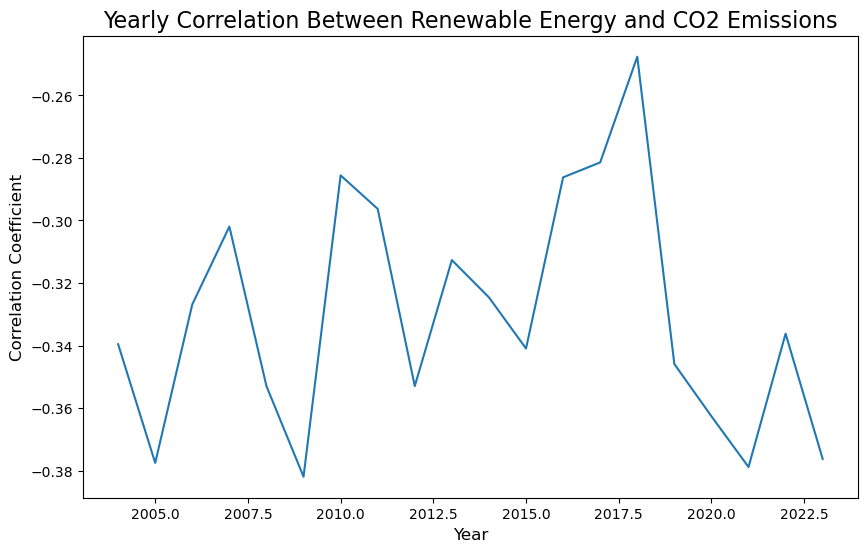

In [23]:
plt.figure(figsize = (10,6))

plt.plot(list(yearly_corr.index), list(yearly_corr.values))
plt.title("Yearly Correlation Between Renewable Energy and CO2 Emissions", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Correlation Coefficient", fontsize=12)
plt.show()

Burada correlation katsayısıyla şunu anlıyoruz:
katsayı negatif olduğu için bu değerler arasında negatif bir ilişki var . Yani birisi artarken diğeri azalıyor. Yenilebilir enerji artarken co2 emisyonu azalıyor. Bu değer -0.26 ile -0.38 arasında gidip geliyor. Bu aralarında bir ilişki olduğunu ama çok güçlü bir ilişki olmadığını gösteriyor. Bunların sebepleri fosil yakıt kullanımı , fabrikalar vesaire gibi başka etkenlerin de olmasıdır.

In [24]:
merged_data["Renewable_Change"] = merged_data.groupby("geo")["Renewable_Energy_Usage"].pct_change()
merged_data["CO2_Change"] = merged_data.groupby("geo")["Annual CO₂ emissions (per capita)"].pct_change()
#pct change yıllık olarak verinin ne kadar değiştiğini ölçüyor. 


renewable_top_countries = merged_data.groupby("geo")["Renewable_Change"].mean().sort_values(ascending=False).head(10)
co2_top_countries = merged_data.groupby("geo")["CO2_Change"].mean().sort_values().head(10)
#hesapladığımız yıllık değişim oranlarının ortalamasını alıyoruz. böylelikle ortalama olarak ülkelerin ne kadar değişime 
#uğradığını görebiliyoruz. bu veri setinden de en çok değişen 10 ülkeleri alıyoruz


print("Yenilenebilir Enerji Kullanım Oranını En Çok Arttıran Ülkeler:")
print(renewable_top_countries)

print("\nCO2 Emisyonunu En Çok Azaltan Ülkeler:")
print(co2_top_countries)

Yenilenebilir Enerji Kullanım Oranını En Çok Arttıran Ülkeler:
geo
Malta          0.396794
Luxembourg     0.172570
Netherlands    0.126396
Belgium        0.117263
Ireland        0.108681
Cyprus         0.108421
Hungary        0.084968
Greece         0.070461
Germany        0.069047
Italy          0.064138
Name: Renewable_Change, dtype: float64

CO2 Emisyonunu En Çok Azaltan Ülkeler:
geo
Luxembourg   -0.044496
Finland      -0.039478
Denmark      -0.038992
Malta        -0.031279
Greece       -0.030693
Sweden       -0.029779
Portugal     -0.028910
Belgium      -0.027625
Spain        -0.027409
Ireland      -0.026941
Name: CO2_Change, dtype: float64


In [25]:
both = []
for country in renewable_top_countries.index:
    if country in(co2_top_countries.index):
        both.append(country)
print(both)

['Malta', 'Luxembourg', 'Belgium', 'Ireland', 'Greece']


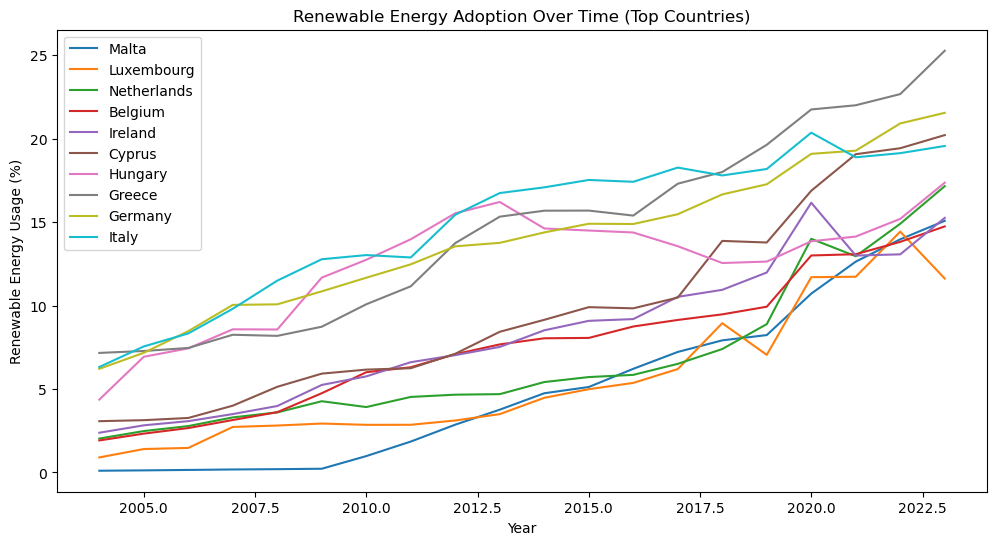

In [26]:
plt.figure(figsize=(12, 6))
top_countries = renewable_top_countries.index
for country in top_countries:
    country_data = merged_data[merged_data["geo"] == country]
    plt.plot(
        list(country_data["Year"]),
        list(country_data["Renewable_Energy_Usage"]),
        label=country
    )

plt.title("Renewable Energy Adoption Over Time (Top Countries)")
plt.xlabel("Year")
plt.ylabel("Renewable Energy Usage (%)")
plt.legend()
plt.show()

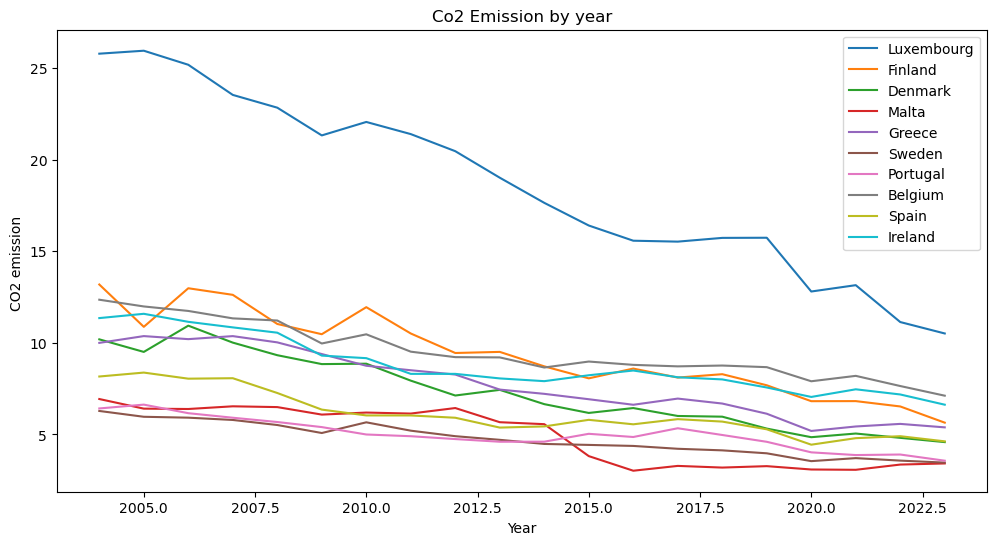

In [27]:
plt.figure(figsize=(12, 6))
top_countries = co2_top_countries.index
for country in top_countries:
    country_data = merged_data[merged_data["geo"] == country]
    plt.plot(
        list(country_data["Year"]),
        list(country_data["Annual CO₂ emissions (per capita)"]),
        label=country
    )

plt.title("Co2 Emission by year")
plt.xlabel("Year")
plt.ylabel("CO2 emission ")
plt.legend()
plt.show()

In [28]:
merged_data.head()

,geo,Year,Renewable_Energy_Usage,Annual CO₂ emissions (per capita),Renewable_Change,CO2_Change
0,Austria,2004,22.553,9.505550,NaN,NaN
1,Belgium,2004,1.916,12.357553,NaN,NaN
2,Bulgaria,2004,9.231,6.403607,NaN,NaN
3,Cyprus,2004,3.071,7.649971,NaN,NaN
4,Germany,2004,6.207,10.677804,NaN,NaN


In [29]:
print(merged_data['geo'])

0       Austria
1       Belgium
2      Bulgaria
3        Cyprus
4       Germany
         ...   
515    Portugal
516     Romania
517      Sweden
518    Slovenia
519    Slovakia
Name: geo, Length: 520, dtype: object


In [30]:
renewable_elc_data_long = data1_elc.melt(
    id_vars=["geo"],
    var_name="Year",
    value_name="Renewable_Energy_Usage"
)

# Yıl verisini int yap
renewable_elc_data_long["Year"] = renewable_elc_data_long["Year"].astype(int)


renewable_heat_cl_data_long = data1_heat_cl.melt(
    id_vars=["geo"],
    var_name="Year",
    value_name="Renewable_Energy_Usage"
)

# Yıl verisini int yap
renewable_heat_cl_data_long["Year"] = renewable_heat_cl_data_long["Year"].astype(int)

renewable_tra_data_long = data1_tra.melt(
    id_vars=["geo"],
    var_name="Year",
    value_name="Renewable_Energy_Usage"
)

# Yıl verisini int yap
renewable_tra_data_long["Year"] = renewable_tra_data_long["Year"].astype(int)


In [31]:
renewable_heat_cl_data_long.head()

,geo,Year,Renewable_Energy_Usage
0,Austria,2004,20.165
1,Belgium,2004,2.927
2,Bulgaria,2004,14.056
3,Cyprus,2004,9.264
4,Czech Republic,2004,9.918


In [32]:
data1_ren.head()

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,geo
0,22.553,24.353,26.276,28.144,28.788,31.039,31.205,31.552,32.734,32.665,...,33.497,33.370,33.136,33.784,33.755,36.545,34.792,34.075,40.844,Austria
1,1.916,2.325,2.658,3.140,3.611,4.746,6.004,6.302,7.086,7.671,...,8.060,8.744,9.136,9.472,9.929,13.000,13.076,13.817,14.741,Belgium
2,9.231,9.173,9.415,9.098,10.345,12.005,13.927,14.152,15.837,18.898,...,18.261,18.760,18.695,20.581,21.545,23.319,19.445,19.044,22.583,Bulgaria
3,3.071,3.131,3.263,4.001,5.131,5.920,6.161,6.245,7.111,8.428,...,9.903,9.833,10.478,13.873,13.777,16.879,19.069,19.427,20.213,Cyprus
4,6.773,7.113,7.362,7.895,8.674,9.977,10.513,10.945,12.814,13.927,...,15.070,14.926,14.799,15.139,16.239,17.303,17.614,18.123,18.586,Czech Republic


In [41]:
# Veri setlerini birleştirme (geo ve Year ortak kolonlarına göre)
data_combined = merged_data.merge(renewable_elc_data_long, on=["geo", "Year"], suffixes=("_REN", "_ELC"))
data_combined = data_combined.merge(renewable_heat_cl_data_long, on=["geo", "Year"], suffixes=("", "_HEAT_CL"))
data_combined = data_combined.merge(renewable_tra_data_long, on=["geo", "Year"], suffixes=("", "_TRA"))


data_combined.head()

,geo,Year,Renewable_Energy_Usage_REN,Annual CO₂ emissions (per capita),Renewable_Change,CO2_Change,Renewable_Energy_Usage_ELC,Renewable_Energy_Usage,Renewable_Energy_Usage_TRA
0,Austria,2004,22.553,9.505550,NaN,NaN,61.627,20.165,4.532
1,Belgium,2004,1.916,12.357553,NaN,NaN,1.714,2.927,0.642
2,Bulgaria,2004,9.231,6.403607,NaN,NaN,8.358,14.056,0.971
3,Cyprus,2004,3.071,7.649971,NaN,NaN,0.019,9.264,0.000
4,Germany,2004,6.207,10.677804,NaN,NaN,9.436,7.198,2.136


In [44]:

data_combined.rename(columns={
    "Renewable_Energy_Usage_REN" : "Renewable_Energy_Usage_Total",
    "Renewable_Energy_Usage" : "Renewable_Energy_Usage_Heating_Cooling"
} , inplace=True)


In [45]:
data_combined.head()

,geo,Year,Renewable_Energy_Usage_Total,Annual CO₂ emissions (per capita),Renewable_Change,CO2_Change,Renewable_Energy_Usage_ELC,Renewable_Energy_Usage_Heating_Cooling,Renewable_Energy_Usage_TRA
0,Austria,2004,22.553,9.505550,NaN,NaN,61.627,20.165,4.532
1,Belgium,2004,1.916,12.357553,NaN,NaN,1.714,2.927,0.642
2,Bulgaria,2004,9.231,6.403607,NaN,NaN,8.358,14.056,0.971
3,Cyprus,2004,3.071,7.649971,NaN,NaN,0.019,9.264,0.000
4,Germany,2004,6.207,10.677804,NaN,NaN,9.436,7.198,2.136


In [47]:
yearly_trends = data_combined.drop(columns=["geo"]).groupby("Year").mean()

In [48]:
yearly_trends.head()

,Renewable_Energy_Usage_Total,Annual CO₂ emissions (per capita),Renewable_Change,CO2_Change,Renewable_Energy_Usage_ELC,Renewable_Energy_Usage_Heating_Cooling,Renewable_Energy_Usage_TRA
Year,,,,,,,
2004,12.535192,8.936477,NaN,NaN,17.025500,16.875962,1.184962
2005,12.981885,8.831492,0.099691,-0.006604,17.387038,17.640962,1.318500
2006,13.208500,8.880809,0.044104,0.009645,17.532115,18.113308,1.740654
2007,13.854538,8.854105,0.115399,0.005122,17.944154,19.384500,2.207731
2008,14.532808,8.571109,0.073834,-0.028862,18.703769,20.220500,2.947538


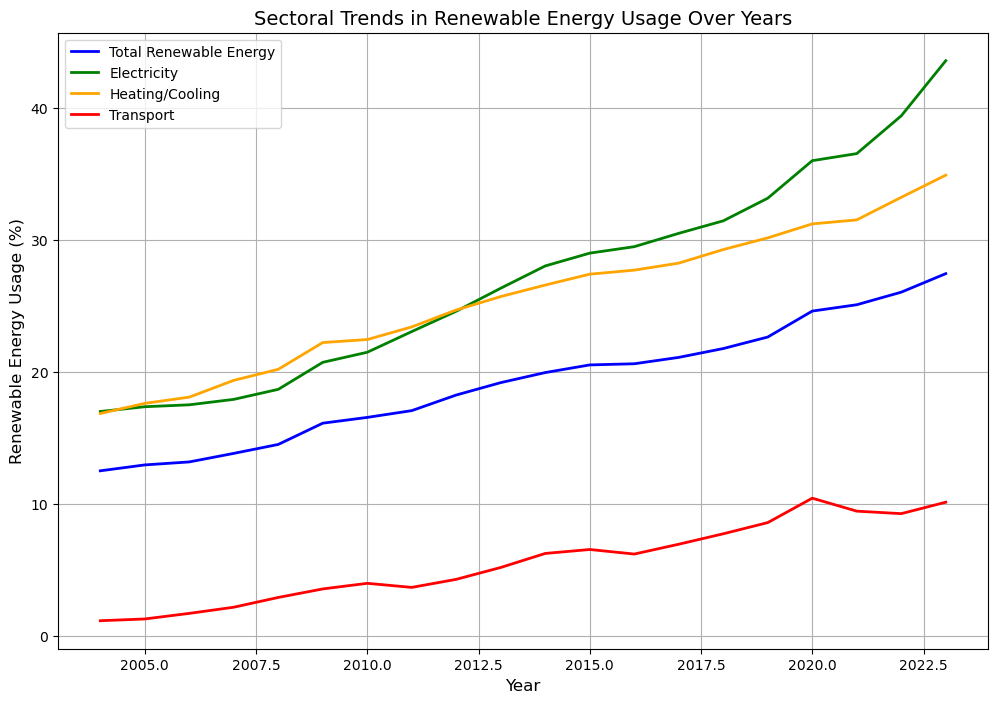

In [53]:
# Zaman serisi trend analizi
plt.figure(figsize=(12, 8))
plt.plot(list(yearly_trends.index), list(yearly_trends["Renewable_Energy_Usage_Total"]), label="Total Renewable Energy", color="blue", linewidth=2)
plt.plot(list(yearly_trends.index), list(yearly_trends["Renewable_Energy_Usage_ELC"]), label="Electricity", color="green" , linewidth=2)
plt.plot(list(yearly_trends.index), list(yearly_trends["Renewable_Energy_Usage_Heating_Cooling"]), label="Heating/Cooling", color="orange" , linewidth=2)
plt.plot(list(yearly_trends.index), list(yearly_trends["Renewable_Energy_Usage_TRA"]), label="Transport", color="red" , linewidth=2)
plt.title("Sectoral Trends in Renewable Energy Usage Over Years", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Renewable Energy Usage (%)", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [54]:
correlations = {
    "Electricity_Renewable vs CO2": data_combined["Renewable_Energy_Usage_ELC"].corr(data_combined["Annual CO₂ emissions (per capita)"]),
    "Heating/Cooling_Renewable vs CO2": data_combined["Renewable_Energy_Usage_Heating_Cooling"].corr(data_combined["Annual CO₂ emissions (per capita)"]),
    "Transport_Renewable vs CO2": data_combined["Renewable_Energy_Usage_TRA"].corr(data_combined["Annual CO₂ emissions (per capita)"]),
    "Total Renewable vs CO2": data_combined["Renewable_Energy_Usage_Total"].corr(data_combined["Annual CO₂ emissions (per capita)"])
}

# Korelasyonları yazdır
print("Sectoral Correlations with CO₂ Emissions:")
for key, value in correlations.items():
    print(f"{key}: {value:.2f}")

Sectoral Correlations with CO₂ Emissions:
Electricity_Renewable vs CO2: -0.39
Heating/Cooling_Renewable vs CO2: -0.38
Transport_Renewable vs CO2: -0.26
Total Renewable vs CO2: -0.39
